In [1]:
import pandas as pd
import numpy as np
import random

df = pd.read_csv('distances.csv')

In [2]:
# Preview
df.head(9)

,Unnamed: 0,Start,Target,Distance
0,0,Aberdeen,Aberdeen,0
1,1,Aberdeen,Adelaide,16192
2,2,Aberdeen,Algiers,2291
3,3,Aberdeen,Amsterdam,696
4,4,Aberdeen,Ankara,3158
5,5,Aberdeen,Asuncin,10521
6,6,Aberdeen,Athens,2849
7,7,Aberdeen,Auckland,17748
8,8,Aberdeen,Bangkok,9469


In [5]:
# Get all distances in a list
distances = [i for i in df["Distance"]]

# Convert list into a distance matrix
number_of_cities = len(pd.unique(df["Start"]))
chunked_dist = [distances[i:i + number_of_cities] for i in range(0, len(distances), number_of_cities)]
distance_matrix = np.matrix(chunked_dist)

In [8]:
# List including total travel distance for each run
total_travel_distances = []

for _ in range(10000):
    # Generete random travel points
    travel_points = [i for i in range(number_of_cities)]
    random.shuffle(travel_points)

    travel_distance = 0
    # Start point for next travel
    start = travel_points[0]

    for i in travel_points[1:]:
        # Add distance
        travel_distance += distance_matrix.item((start, i))

        # Change next travel start point
        start = i

    # Add travel from first to last point
    travel_distance += distance_matrix.item((start, travel_points[0]))

    # Add total distance to list
    total_travel_distances.append(travel_distance)

In [9]:
# Printing some statistics
avg_time = int(sum(total_travel_distances) / len(total_travel_distances))
print("Total travels: ", len(total_travel_distances))
print("Avg. travel time:", avg_time)

Total travels:  10000
Avg. travel time: 991401


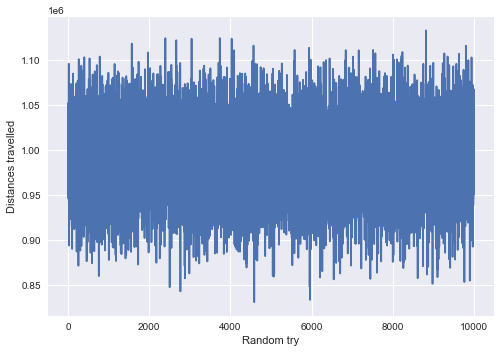

In [10]:
from matplotlib import pyplot as plt

# Plotting
plt.style.use('seaborn')
plt.plot(total_travel_distances)
plt.xlabel('Random try')
plt.ylabel('Distances travelled')

plt.show()